# Ford GoBike System Exploration
## by Amgad Elfeki

## Preliminary Wrangling

- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading in our dataset
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(gobike.shape)
gobike.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Removing the unwanted columns from the dataset
gobike.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)

In [5]:
# Changing data type of start_time and end_time to datetime
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

In [6]:
# Creating a new column for users' age. We considered their age during the year 2020
gobike['member_age'] = 2020 - gobike['member_birth_year']
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,36.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,46.0


In [7]:
#Rechecking our data after the data wrangling
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        183412 non-null  int64         
 1   start_time          183412 non-null  datetime64[ns]
 2   end_time            183412 non-null  datetime64[ns]
 3   start_station_id    183215 non-null  float64       
 4   start_station_name  183215 non-null  object        
 5   end_station_id      183215 non-null  float64       
 6   end_station_name    183215 non-null  object        
 7   bike_id             183412 non-null  int64         
 8   user_type           183412 non-null  object        
 9   member_birth_year   175147 non-null  float64       
 10  member_gender       175147 non-null  object        
 11  member_age          175147 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 16.8+ MB


In [8]:
# Finding how many bikes there are in this dataset
gobike.bike_id.nunique()

4646

### What is the structure of your dataset?

> The dataset has 183412 rows of rides featuring 11 columns. Those 183412 rides were made by 4646 bikes.

### What is/are the main feature(s) of interest in your dataset?

> - Average trip duration
- Users' Genders
- The impact of users' age on the trip duration
- The impact of the users' type along with their age on the trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - Trip Duration
- Member Gender
- Member Year of Birth will support finding the users' age
- User Type

## Univariate Exploration

### Average Trip Duration

Text(0.5, 0, 'Duration (Sec)')

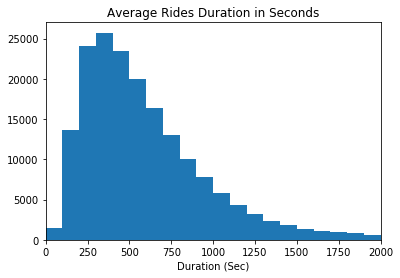

In [9]:
#Plotting the average trip duration in seconds
bins = np.arange(0, gobike['duration_sec'].max()+100, 100)
plt.hist(data = gobike, x = 'duration_sec', bins = bins);
plt.xlim(0,2000)
plt.title('Average Rides Duration in Seconds')
plt.xlabel('Duration (Sec)')

From the above analysis, we can see that most of the rides last for about 7000 seconds. For a better understanding, we will check the average rides duration in minutes

In [10]:
# Converting the the seconds into minutes
gobike['duration_min']=gobike['duration_sec']/60

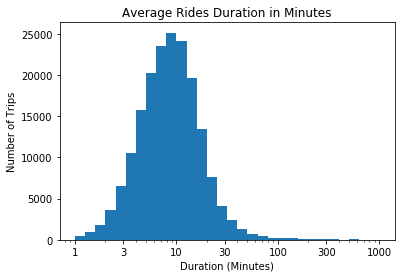

In [11]:
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = gobike , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Rides Duration in Minutes');
plt.ylabel('Number of Trips');

From the above analysis, we can see that the average trips last between 1 minute till about 100 minutes

### Users' Genders

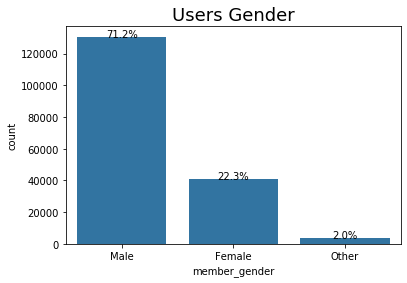

In [12]:
# Unifying the color of the plot
base_color = sb.color_palette()[0]
# Ordering the values index for a better visualization
freq = gobike['member_gender'].value_counts().index

sb.countplot(data=gobike, x='member_gender', color=base_color, order=freq);
plt.title('Users Gender', fontsize = 18);

type_counts = gobike['member_gender'].value_counts()

locs, labels = plt.xticks() 

# loop through each pair of locations to add the percentage
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/(gobike.shape[0]))
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

From the above plot, we can conclude that the majority of the riders are males and they form 71.2% of the whole users, followed by females 22.3%, while 2% of the riders did not prefer to mention their gender identity.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> During the average trip duration analysis, we performed it agains time in seconds and in minutes to get better insights

## Bivariate Exploration

### Which gender subscribes more to the system?

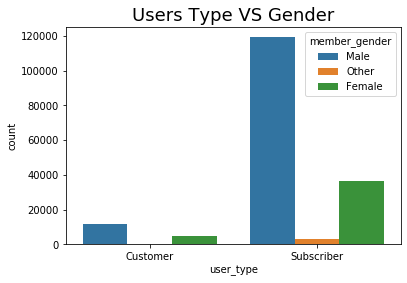

In [13]:
sb.countplot(data = gobike, x = 'user_type', hue = 'member_gender');
plt.title('Users Type VS Gender', fontsize = 18);

From the above analysis, we can conclude that most of the subscribers are male counting up to 120000 users, while the females are less than 50% of the subscribers.

### Trip Duration against Users' Age

(0, 10000)

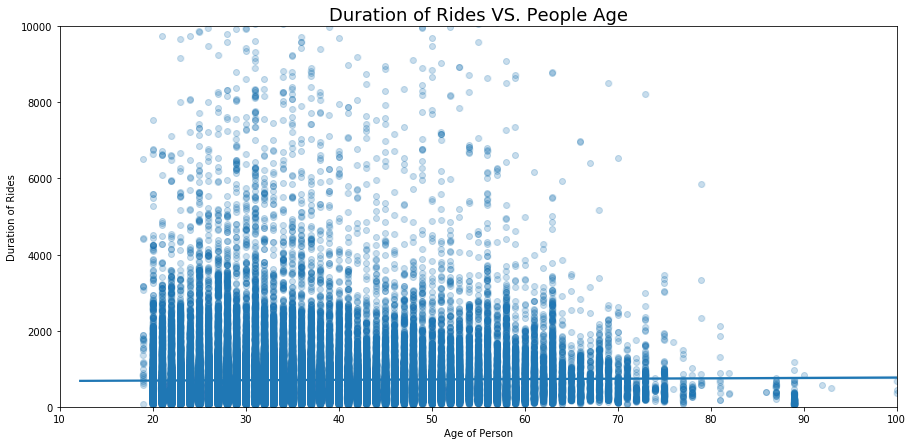

In [14]:
#Visualizing the data in a scatterplot
plt.figure(figsize = (15, 7))
plt.scatter(data = gobike, x = 'member_age', y = 'duration_sec', alpha = 0.2);
sb.regplot(data = gobike, x = 'member_age', y = 'duration_sec', truncate=False, x_jitter=0.1, scatter_kws={'alpha':1/20});
plt.title('Duration of Rides VS. People Age', fontsize = 18);
plt.xlabel('Age of Person');
plt.ylabel('Duration of Rides');
plt.xlim(10, 100)
plt.ylim(0, 10000)

It is pretty clear that the vizualization is right skew, where people in their 30s tend to take the longest rides.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- It was noted that males are more likely to subscribe than females
- We also noted that as people's age increase, their trip duration increases, until they reach 30s, and their trip duration start decreasing with increasing their age.


## Multivariate Exploration

### Ride Duration across users' type and age

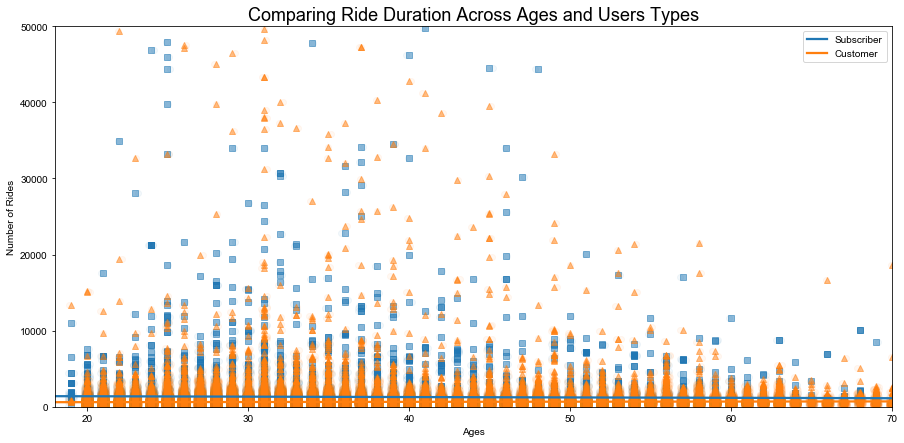

In [15]:
#Visualizing the data in an adapted scatterplot with a sample size of 250000 records
plt.figure(figsize = (15,7))

cat_markers = [['Customer', 's'],
               ['Subscriber', '^']]

for cat, marker in cat_markers:
    df_usertype = gobike[gobike['user_type'] == cat]
    plt.scatter(data = df_usertype, x = 'member_age', y = 'duration_sec', marker = marker, alpha = 0.5);
    sb.regplot(data = df_usertype, x = 'member_age', y = 'duration_sec', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/20});
plt.legend(['Subscriber', 'Customer']);
plt.xlim(18, 70);
plt.ylim(0, 50000);
plt.title('Comparing Ride Duration Across Ages and Users Types', fontsize = 18);
plt.xlabel('Ages');
plt.ylabel('Number of Rides');
plt.style.use('seaborn')

From the above analysis, it is noted that the longest trips are made by users who are in their 30s, and those users are not subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The last analysis strengthens our previous conclusion that the trip durations are the longest across people in their 30s

### Were there any interesting or surprising interactions between features?

> Surprisingly, it was noted that the longest trips are made by users who are not subscribers, which requires further digging to understand why they do not subscribe and still use the service for long trips.